In [1]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
import matplotlib.cm as cm
from collections import Counter
plt.style.use('bmh'); sns.set()

In [10]:
price = pd.read_excel('Data-Property-Indonesia-2021.xlsx')
price

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
0,2021-03-12,75,38,2,1,1,1,Bojonggede,SHM,1300,Barat,692550000,https://rumahdijual.com/bekasi/10799791-rumah-...,"Dekat tol jati warna, dekat sutle busway, deka..."
1,2021-06-12,60,40,1,1,0,1,Babakan Madang,SHM,2200,NaN,811400000,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...
2,2021-06-12,60,50,2,2,0,1,Babakan Madang,SHM,2200,NaN,900500000,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...
3,2021-06-12,60,70,3,2,0,1,Babakan Madang,SHM,2200,NaN,1001900000,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...
4,2021-06-12,90,60,3,2,0,2,Babakan Madang,SHM,2200,NaN,1200800000,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,2021-03-12,90,36,2,1,0,1,Gunung Putri,SHM,1300,NaN,440550000,https://www.rumah.com/listing-properti/dijual-...,"Dekat taman buah mekarsari, dekat rumah sakit"
189,2021-03-12,107,31,2,1,0,1,Sukaraja,SHM,1300,NaN,408650000,https://www.rumah.com/listing-properti/dijual-...,Rumah siap huni
190,2021-03-12,210,150,4,2,1,1,Bogor Selatan,SHM,2200,NaN,1200000000,https://www.rumah.com/listing-properti/dijual-...,Cuma 10 menit ke kota
191,2021-03-12,90,36,2,1,0,1,Cileungsi,SHM,1300,NaN,440550000,https://www.rumah.com/listing-properti/dijual-...,"Dekat rumah sakit, dekat pasar"


In [38]:
price.isnull().sum()

LT              0
LB              0
KT              0
KM              0
garasi          0
carport         0
lokasi          0
sertifikat      0
listrik         0
hadap         174
harga           0
URL             0
deskripsi       0
dtype: int64

In [13]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   created_at  193 non-null    datetime64[ns]
 1   LT          193 non-null    int64         
 2   LB          193 non-null    int64         
 3   KT          193 non-null    int64         
 4   KM          193 non-null    int64         
 5   garasi      193 non-null    int64         
 6   carport     193 non-null    int64         
 7   lokasi      193 non-null    object        
 8   sertifikat  193 non-null    object        
 9   listrik     193 non-null    int64         
 10  hadap       19 non-null     object        
 11  harga       193 non-null    int64         
 12  URL         193 non-null    object        
 13  deskripsi   193 non-null    object        
dtypes: datetime64[ns](1), int64(8), object(5)
memory usage: 21.2+ KB


In [24]:
price_drop = price.drop(['created_at'], axis=1, inplace=True)
price['sertifikat'] = price['sertifikat'].astype('category')
price['lokasi'] = price['lokasi'].astype('category')
price['hadap'] = price['hadap'].astype('category')
price['URL'] = price['URL'].astype('category')
price['carport'] = price['carport'].astype('category')
price['deskripsi'] = price['deskripsi'].astype('category')
price2 = price[np.abs(price.harga - price.harga.mean())<=(2*price.harga.std())]
price2.info()

KeyError: "['created_at'] not found in axis"

In [25]:
price.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
LT,193.0,NaN,NaN,NaN,143.57513,191.576208,30.0,66.0,84.0,120.0,1500.0
LB,193.0,NaN,NaN,NaN,98.663212,125.851746,21.0,36.0,58.0,90.0,1200.0
KT,193.0,NaN,NaN,NaN,2.694301,1.110939,1.0,2.0,2.0,3.0,8.0
KM,193.0,NaN,NaN,NaN,1.797927,1.175087,1.0,1.0,1.0,2.0,6.0
garasi,193.0,NaN,NaN,NaN,0.15544,0.485931,0.0,0.0,0.0,0.0,3.0
carport,193.0,8.0,1.0,140.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lokasi,193,27,Gunung Putri,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sertifikat,193,3,SHM,155,NaN,NaN,NaN,NaN,NaN,NaN,NaN
listrik,193.0,NaN,NaN,NaN,2076.165803,1562.633932,900.0,1300.0,1300.0,2200.0,17600.0
hadap,19,7,Selatan,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
price2.corr()

,LT,LB,KT,KM,garasi,listrik,harga
LT,1.000000,0.769748,0.631686,0.607806,0.304075,0.492920,0.786202
LB,0.769748,1.000000,0.743150,0.717465,0.360129,0.631636,0.868938
KT,0.631686,0.743150,1.000000,0.847115,0.259175,0.525994,0.700914
KM,0.607806,0.717465,0.847115,1.000000,0.367602,0.677810,0.740420
garasi,0.304075,0.360129,0.259175,0.367602,1.000000,0.386157,0.393362
listrik,0.492920,0.631636,0.525994,0.677810,0.386157,1.000000,0.687134
harga,0.786202,0.868938,0.700914,0.740420,0.393362,0.687134,1.000000


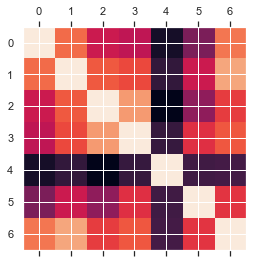

In [27]:
plt.matshow(price2.corr())
plt.show()

Apakah ada kecenderungan perbedaan harga rumah dari lokasi yang berbeda?

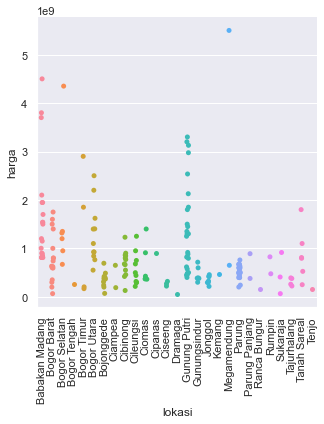

In [36]:
p= sns.catplot(x="lokasi", y="harga", data=price2)
plt.xticks(rotation=90)
plt.show()

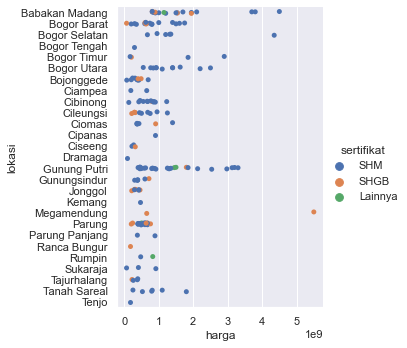

In [37]:
# Bisa juga plot dengan informasi dari 3 variabel sekaligus
# (untuk melihat kemungkinan faktor interaksi)
p= sns.catplot(x="harga", y="lokasi", hue="sertifikat", data=price2)

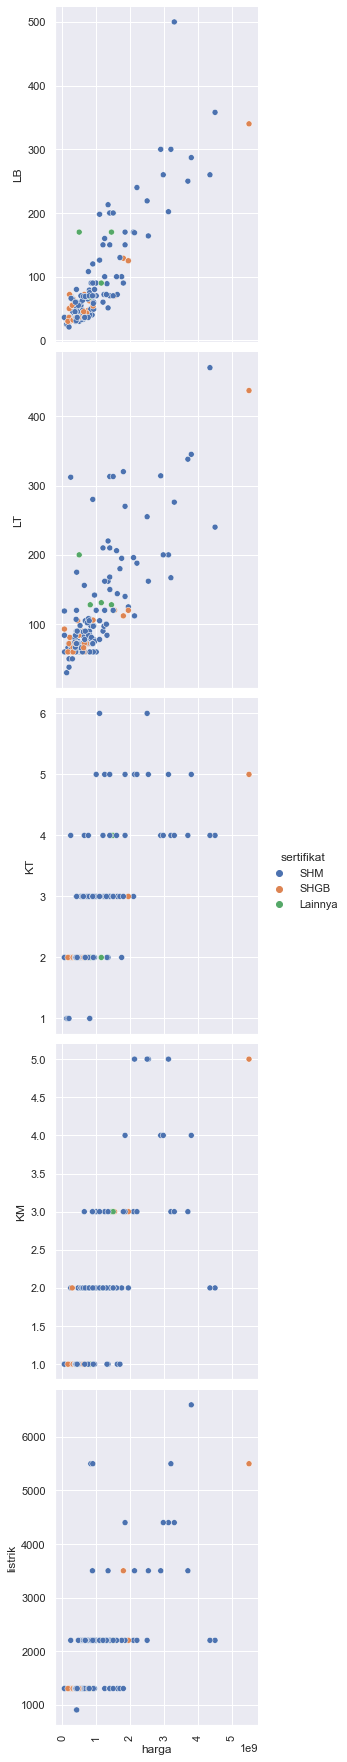

In [43]:
p= sns.pairplot(x_vars=["harga"], y_vars=["LB","LT","KT","KM","listrik"], data=price2, size=5, aspect=0.75, hue="sertifikat")
plt.xticks(rotation=90)
plt.show()

In [46]:
tips=sns.load_dataset('listrik')
categorical = tips.select_dtypes(include = ['category']).columns
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(tips[variable], ax=subplot)

ValueError: 'listrik' is not one of the example datasets.

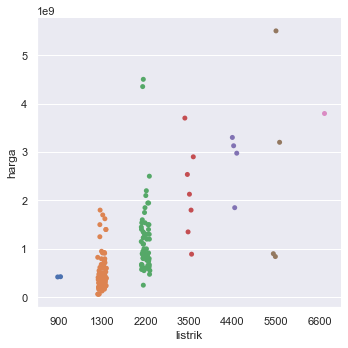

In [47]:
p = sns.catplot(x="listrik", y="harga", data=price2)